In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

datas = [train, test]

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
for data in datas:
    print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


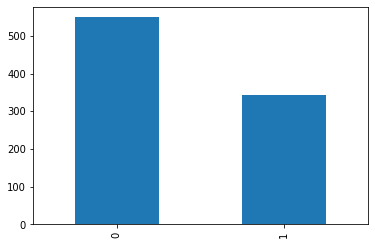

In [5]:
train['Survived'].value_counts().plot.bar()

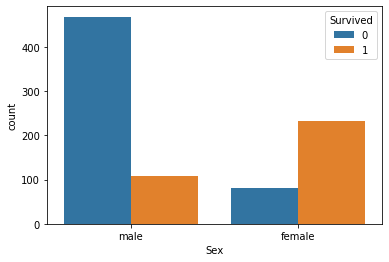

In [6]:
sns.countplot('Sex', hue='Survived', data = train)

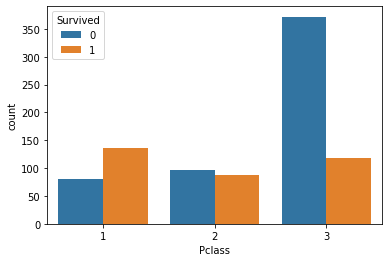

In [7]:
sns.countplot('Pclass', hue='Survived', data = train)

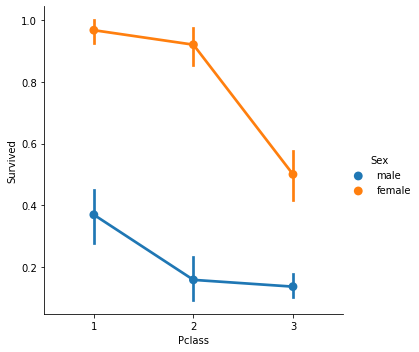

In [8]:
sns.factorplot('Pclass','Survived', hue='Sex', data = train)

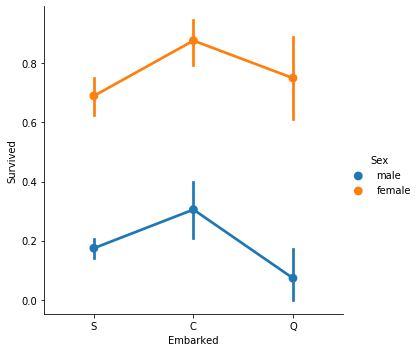

In [9]:
sns.factorplot('Embarked','Survived', hue='Sex', data = train)

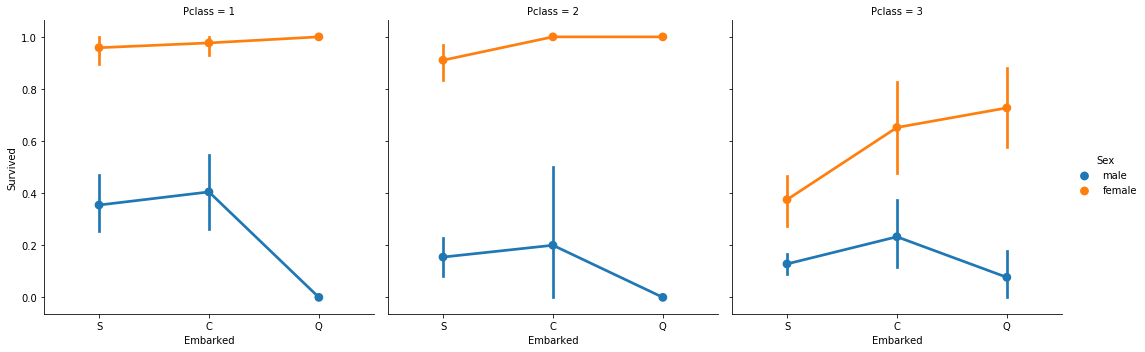

In [10]:
sns.factorplot('Embarked','Survived', hue='Sex', col= 'Pclass', data = train)

In [11]:
for data in datas:
    data['Initial']=0
    data['Initial']= data['Name'].str.extract('([A-Za-z]+)\.')


In [12]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [13]:
for data in datas:
    data['Initial'].replace(['Ms','Mme', 'Mlle','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt', 'Sir', 'Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Miss'],inplace=True)
    


In [14]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [16]:
for data in datas:
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age']=33
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age']=5
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age']=36
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age']=22
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age']=46




In [17]:
print(datas[0]['Age'].isnull().sum())
print(datas[1]['Age'].isnull().sum())
print(datas[0]['Initial'].unique())
print(datas[1]['Initial'].unique())


0
0
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [18]:
for data in datas:
    data['Embarked'].fillna('S', inplace= True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [20]:
#fare
for data in datas:
    data.loc[(data['Fare'].isnull()), 'Fare']=0

In [21]:
for data in datas:
    data['Age_band'] =0
    data.loc[data['Age']< 16, 'Age_band'] =0
    data.loc[(data['Age']> 16) & (data['Age'] <= 32),'Age_band'] =1
    data.loc[(data['Age']> 32) & (data['Age'] <= 48),'Age_band'] =2
    data.loc[(data['Age']> 48) & (data['Age'] <= 64),'Age_band'] =3
    data.loc[data['Age']> 64 ,'Age_band'] =4



    

In [22]:
for data in datas:
    data['Family_size'] =0 
    data['Family_size'] = data['Parch'] + data['SibSp'] 
    data['Alone'] =0 
    data.loc[data['Family_size'] ==0, 'Alone'] =1


In [23]:
for data in datas:
    data['Sex'].replace(['male','female'], [0,1], inplace = True)
    data['Embarked'].replace(['S','Q','C'],[0,1,2], inplace = True)
    data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace = True)    

In [24]:
for data in datas:
    data.drop(['Name','Age','Ticket','Cabin','PassengerId'], axis=1, inplace= True)
    
    

In [23]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Initial', 'Age_band', 'Family_size', 'Alone'],
      dtype='object')

In [24]:
test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Initial',
       'Age_band', 'Family_size', 'Alone'],
      dtype='object')

In [25]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_size,Alone
0,0,3,0,1,0,7.2500,0,0,1,1,0
1,1,1,1,1,0,71.2833,2,1,2,1,0
2,1,3,1,0,0,7.9250,0,2,1,0,1
3,1,1,1,1,0,53.1000,0,1,2,1,0
4,0,3,0,0,0,8.0500,0,0,2,0,1


# MAKE MODEL

In [26]:
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import  VotingClassifier
from sklearn.svm import  SVC

from sklearn.model_selection import GridSearchCV

In [27]:
X= train[train.columns[1:]]
Y= train['Survived']

In [28]:
rf = RandomForestClassifier()

## grid seacrch
rf_param_grid = {
    'max_depth': [None],
    'max_features': [1,3,10],
    'min_samples_split':[2,3,10],
    'min_samples_leaf':[1,3,10],
    'bootstrap':[False],
    'n_estimators':[100,300,500,700,800,900]
    
}
rf_grid = GridSearchCV(rf, param_grid= rf_param_grid, scoring= 'accuracy', n_jobs=4, verbose=1)

rf_grid.fit(X,Y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:  3.9min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'max_depth': [None],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300, 500, 700, 800, 900]},
             scoring='accuracy', verbose=1)

In [29]:
rf_best = rf_grid.best_estimator_
print(rf_grid.best_score_)
# print(rf_best)
print(rf_grid.best_params_)

0.8383842822170611
{'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}


In [30]:
gb = GradientBoostingClassifier()

## grid seacrch
gb_param_grid = {
    'loss':['deviance'],
    'n_estimators': [100,300,500,1000],
    'learning_rate':[0.1,0.05,0.01],
    'max_depth': [4,8],
    'max_features': [1,3,10],
    'min_samples_leaf':[100,150,200]
    
}
gb_grid = GridSearchCV(gb, param_grid= gb_param_grid, scoring= 'accuracy', n_jobs=4, verbose=1)

gb_grid.fit(X,Y)
gb_best = gb_grid.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:   20.5s
[Parallel(n_jobs=4)]: Done 522 tasks      | elapsed:   41.1s
[Parallel(n_jobs=4)]: Done 872 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  1.5min finished


In [31]:
svc = SVC()
svc_param_grid = {'kernel': ['rbf'], 
                 'gamma': [0.001, 0.01, 0.1, 0.5, 1],
                 'C': [0.01, 0.1, 1, 10, 50, 100, 200, 300]}

svc_grid = GridSearchCV(svc, param_grid= svc_param_grid, scoring='accuracy', n_jobs=4, verbose=1)
svc_grid.fit(X,Y)

svc_best = svc_grid.best_estimator_
print(svc_grid.best_score_)
print(svc_best)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.2s


0.8069549934090766
SVC(C=300, gamma=0.001)


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.3s finished


In [32]:
print(svc_grid.best_params_)

{'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}


In [33]:
vote = VotingClassifier(estimators= [('rf',rf_best),
                                    ('gb', gb_best),
                                    ('svc', svc_best)], voting= 'soft', n_jobs=4)
vote_result = vote.fit(X,Y)


In [34]:
vote_result

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=3,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     n_estimators=300)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=8,
                                                         max_features=10,
                                                         min_samples_leaf=100,
                                                         n_estimators=1000)),
                             ('svc', SVC(C=300, gamma=0.001))],
                 n_jobs=4, voting='soft')

In [35]:
test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_size,Alone
0,3,0,0,0,7.8292,1,0,2,0,1
1,3,1,1,0,7.0000,0,1,2,1,0
2,2,0,0,0,9.6875,1,0,3,0,1
3,3,0,0,0,8.6625,0,0,1,0,1
4,3,1,1,1,12.2875,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,8.0500,0,0,2,0,1
414,1,1,0,0,108.9000,2,2,2,0,1
415,3,0,0,0,7.2500,0,0,2,0,1
416,3,0,0,0,8.0500,0,0,2,0,1


In [37]:
pred= vote.predict(test)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
print(pred)